In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [2]:
dataset = pd.read_csv('loans_full_schema.csv')
dataset.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,Mar-2018,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,Feb-2018,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,Feb-2018,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,Jan-2018,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,Mar-2018,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [3]:
X = dataset.drop(['interest_rate', 'state', 'emp_title', 'loan_purpose','paid_total', 'paid_principal', 
                 'paid_interest', 'paid_late_fees', 'term', 'installment','issue_month'], axis=1)
Y = dataset['interest_rate']
X

,emp_length,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,...,tax_liens,public_record_bankrupt,application_type,loan_amount,grade,sub_grade,loan_status,initial_listing_status,disbursement_method,balance
0,3.0,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,0,38.0,...,0,0,individual,28000,C,C3,Current,whole,Cash,27015.86
1,10.0,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,0,NaN,...,0,1,individual,5000,C,C1,Current,whole,Cash,4651.37
2,3.0,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,0,28.0,...,0,0,individual,2000,D,D1,Current,fractional,Cash,1824.63
3,1.0,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,0,NaN,...,1,0,individual,21600,A,A3,Current,whole,Cash,18853.26
4,10.0,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,0,NaN,...,0,0,joint,23000,C,C3,Current,whole,Cash,21430.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,RENT,108000.0,Source Verified,22.28,NaN,NaN,NaN,0,NaN,...,0,1,individual,24000,A,A4,Current,whole,Cash,21586.34
9996,8.0,MORTGAGE,121000.0,Verified,32.38,NaN,NaN,NaN,4,9.0,...,0,0,individual,10000,D,D3,Current,whole,Cash,9147.44
9997,10.0,MORTGAGE,67000.0,Verified,45.26,107000.0,Source Verified,29.57,2,6.0,...,0,0,joint,30000,E,E2,Current,fractional,Cash,27617.65
9998,1.0,MORTGAGE,80000.0,Source Verified,11.99,NaN,NaN,NaN,0,NaN,...,0,0,individual,24000,A,A1,Current,whole,Cash,21518.12


In [4]:
X['homeownership'] = pd.factorize(dataset['homeownership'])[0]
X['verified_income'] = pd.factorize(dataset['verified_income'])[0]
X['verification_income_joint'] = pd.factorize(dataset['verification_income_joint'])[0]
X['application_type'] = pd.factorize(dataset['application_type'])[0]
X['grade'] = pd.factorize(dataset['grade'])[0]
X['sub_grade'] = pd.factorize(dataset['sub_grade'])[0]
X['loan_status'] = pd.factorize(dataset['loan_status'])[0]
X['initial_listing_status'] = pd.factorize(dataset['initial_listing_status'])[0]
X['disbursement_method'] = pd.factorize(dataset['disbursement_method'])[0]

In [5]:
X

,emp_length,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,...,tax_liens,public_record_bankrupt,application_type,loan_amount,grade,sub_grade,loan_status,initial_listing_status,disbursement_method,balance
0,3.0,0,90000.0,0,18.01,NaN,-1,NaN,0,38.0,...,0,0,0,28000,0,0,0,0,0,27015.86
1,10.0,1,40000.0,1,5.04,NaN,-1,NaN,0,NaN,...,0,1,0,5000,0,1,0,0,0,4651.37
2,3.0,1,40000.0,2,21.15,NaN,-1,NaN,0,28.0,...,0,0,0,2000,1,2,0,1,0,1824.63
3,1.0,1,30000.0,1,10.16,NaN,-1,NaN,0,NaN,...,1,0,0,21600,2,3,0,0,0,18853.26
4,10.0,1,35000.0,0,57.96,57000.0,0,37.66,0,NaN,...,0,0,1,23000,0,0,0,0,0,21430.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.0,1,108000.0,2,22.28,NaN,-1,NaN,0,NaN,...,0,1,0,24000,2,14,0,0,0,21586.34
9996,8.0,0,121000.0,0,32.38,NaN,-1,NaN,4,9.0,...,0,0,0,10000,1,9,0,0,0,9147.44
9997,10.0,0,67000.0,0,45.26,107000.0,2,29.57,2,6.0,...,0,0,1,30000,5,24,0,1,0,27617.65
9998,1.0,0,80000.0,2,11.99,NaN,-1,NaN,0,NaN,...,0,0,0,24000,2,15,0,0,0,21518.12


In [6]:
X.fillna(0, inplace=True)

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)

pd.set_option('precision', 3)
print(fit.scores_)



[1.37584425e+00 1.83168737e+00 3.17039104e+00 3.70281198e+00
 4.71910016e+00 1.67755807e+00 2.40401864e+00 3.59403661e+00
 2.89427988e+00 2.87363964e+00 4.47570792e+00 4.93568406e+00
 1.79090480e+00 1.08088811e+00 5.68525398e+00 1.10485907e+00
 1.36591904e+00 1.81940422e+00 3.66731137e+00 5.98825070e-01
 7.24021544e-01 1.39967212e+00 4.41099966e+00 1.41630505e+00
 1.10328219e+00            nan 5.98825070e-01 1.09652175e+00
 2.08131032e+01 2.03019681e+00 1.05970867e+00 2.40034942e+00
 5.87887128e+00 5.48600901e+00 1.27188161e+00 2.05184206e+00
 2.35921436e+00 3.02596381e+00 4.67931264e+06 3.74007010e+06
 6.45053990e+00 6.97428663e+00 1.24080906e+01 3.39560785e+00]


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [25] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [8]:
features = []

for i in range(len(fit.scores_)):
    if fit.scores_[i] > 3.0 or fit.scores_[i]<-3.0:
        col = X.columns[i]
        features.append(col)

In [9]:
features

['annual_income',
 'verified_income',
 'debt_to_income',
 'debt_to_income_joint',
 'earliest_credit_line',
 'inquiries_last_12m',
 'total_credit_limit',
 'months_since_90d_late',
 'accounts_opened_24m',
 'total_debit_limit',
 'num_mort_accounts',
 'account_never_delinq_percent',
 'loan_amount',
 'grade',
 'sub_grade',
 'loan_status',
 'initial_listing_status',
 'disbursement_method',
 'balance']

In [10]:
new_X = X[features]
new_X

,annual_income,verified_income,debt_to_income,debt_to_income_joint,earliest_credit_line,inquiries_last_12m,total_credit_limit,months_since_90d_late,accounts_opened_24m,total_debit_limit,num_mort_accounts,account_never_delinq_percent,loan_amount,grade,sub_grade,loan_status,initial_listing_status,disbursement_method,balance
0,90000.0,0,18.01,0.00,2001,6,70795,38.0,5,11100,1,92.9,28000,0,0,0,0,0,27015.86
1,40000.0,1,5.04,0.00,1996,1,28800,0.0,11,16500,0,100.0,5000,0,1,0,0,0,4651.37
2,40000.0,2,21.15,0.00,2006,4,24193,28.0,13,4300,0,93.5,2000,1,2,0,1,0,1824.63
3,30000.0,1,10.16,0.00,2007,0,25400,0.0,1,19400,0,100.0,21600,2,3,0,0,0,18853.26
4,35000.0,0,57.96,37.66,2008,7,69839,0.0,6,32700,0,100.0,23000,0,0,0,0,0,21430.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,108000.0,2,22.28,0.00,2008,5,199195,0.0,8,44600,1,100.0,24000,2,14,0,0,0,21586.34
9996,121000.0,0,32.38,0.00,1994,1,382061,9.0,0,28200,2,82.1,10000,1,9,0,0,0,9147.44
9997,67000.0,0,45.26,29.57,2004,0,346402,0.0,4,14900,2,72.2,30000,5,24,0,1,0,27617.65
9998,80000.0,2,11.99,0.00,1999,1,294475,0.0,2,46000,6,100.0,24000,2,15,0,0,0,21518.12


In [11]:
y1 = np.array(Y)

In [12]:
verifiedIncome = new_X.verified_income.astype("category").cat.codes
verifiedIncomecat = pd.Series(verifiedIncome)

In [13]:
gradecat=new_X.grade.astype("category").cat.codes
gradecat=pd.Series(gradecat)

In [14]:
subgradecat=new_X.sub_grade.astype("category").cat.codes
subgradecat=pd.Series(subgradecat)

In [15]:
loanStatuscat=new_X.loan_status.astype("category").cat.codes
loanStatuscat=pd.Series(loanStatuscat)

In [16]:
initial_listing_statusCat=new_X.initial_listing_status.astype("category").cat.codes
initial_listing_statusCat=pd.Series(initial_listing_statusCat)


In [17]:
disbursement_methodCat=new_X.disbursement_method.astype("category").cat.codes
disbursement_methodCat=pd.Series(disbursement_methodCat)

In [18]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [19]:
x1 = np.column_stack((new_X['annual_income'],verifiedIncomecat, new_X['debt_to_income'], new_X['debt_to_income_joint'],
                      new_X['earliest_credit_line'],new_X['inquiries_last_12m'],
                      new_X['total_credit_limit'], new_X['months_since_90d_late'], new_X['accounts_opened_24m'], new_X['total_debit_limit'],
                      new_X['num_mort_accounts'], new_X['account_never_delinq_percent'],
                      new_X['loan_amount'], gradecat, subgradecat, loanStatuscat, initial_listing_statusCat, disbursement_methodCat, new_X['balance']))
x1 = sm.add_constant(x1, prepend=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, shuffle=True)

In [21]:
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_x.fit(X_train)
xtrain_scale=scaler_x.transform(X_train)

scaler_x.fit(X_test)
xtest_scale=scaler_x.transform(X_test)

scaler_y.fit(y_train)
ytrain_scale = scaler_y.transform(y_train)

scaler_y.fit(y_test)
ytest_scale = scaler_y.transform(y_test)

In [24]:

# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam

In [25]:
model = Sequential()

model.add(Dense(1164, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(200, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [26]:
custom_optimizer=Adam(learning_rate=0.01)

In [27]:
model.compile(loss='mean_squared_logarithmic_error', optimizer=custom_optimizer, metrics=['mse'])

In [28]:
history = model.fit(xtrain_scale, ytrain_scale, epochs=15, batch_size=100, verbose=1, validation_split=0.2)

Epoch 1/15
56/56 [==============================] - 4s 43ms/step - loss: 0.0190 - mse: 0.0340 - val_loss: 0.0162 - val_mse: 0.0284
Epoch 2/15
56/56 [==============================] - 2s 36ms/step - loss: 0.0104 - mse: 0.0190 - val_loss: 0.0047 - val_mse: 0.0078
Epoch 3/15
56/56 [==============================] - 2s 38ms/step - loss: 0.0024 - mse: 0.0042 - val_loss: 0.0014 - val_mse: 0.0024
Epoch 4/15
56/56 [==============================] - 2s 37ms/step - loss: 0.0011 - mse: 0.0019 - val_loss: 0.0010 - val_mse: 0.0019
Epoch 5/15
56/56 [==============================] - 2s 42ms/step - loss: 9.1067e-04 - mse: 0.0016 - val_loss: 7.7411e-04 - val_mse: 0.0014
Epoch 6/15
56/56 [==============================] - 2s 40ms/step - loss: 7.3956e-04 - mse: 0.0013 - val_loss: 7.4448e-04 - val_mse: 0.0013
Epoch 7/15
56/56 [==============================] - 2s 42ms/step - loss: 6.1553e-04 - mse: 0.0011 - val_loss: 6.9234e-04 - val_mse: 0.0012
Epoch 8/15
56/56 [==============================] - 2s 38ms

In [29]:
predictions = model.predict(xtest_scale)

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


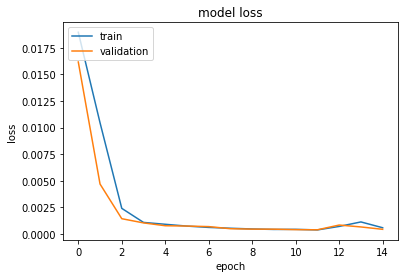

In [30]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [31]:
predictions = scaler_y.inverse_transform(predictions)

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
rmse = np.sqrt(mean_squared_error(y_test, predictions))
rmse

0.766082300938084